In [14]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

# Ordinary Differential Equations (ODEs)

## Analytical solution

Define parameters

In [15]:
# time domain
t_start = 0.0
t_end = 30.0
n = 500
t = np.linspace(t_start, t_end, n)
dt = t[1]-t[0]

# initial condition
cA_0 = 1.0
cA_0 = 0.0

# kinetic constant
k = 0.2

Define analytical solution

In [16]:
def cA(k, t):
    return np.exp(-k*t)

def cB(k, t):
    return 1 - np.exp(-k*t)

Plot the results

/tmp/ipykernel_17335/180251460.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


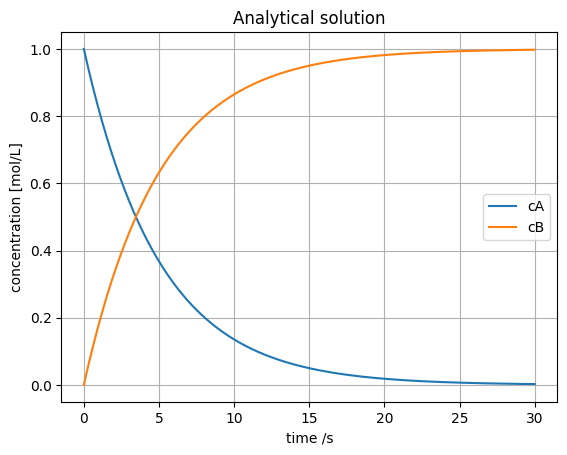

In [17]:
fig, ax = plt.subplots()
ax.plot(t, cA(k, t), label = "cA")
ax.plot(t, cB(k, t), label = "cB")
ax.set_xlabel("time /s")
ax.set_ylabel("concentration [mol/L]")
ax.set_title("Analytical solution")
ax.legend()
ax.grid()
fig.show()

## Analytical solution using matrix

In [18]:
# rate constants 
k1 = 1
k2 = 0
k3 = 2
k4 = 3

In [19]:
# initial condition
c_0 = np.array([1,0,0])

In [20]:
# matrix of the rates
K = np.array([[-1,0,0],[1,-2,3],[0,2,-3]])

In [21]:
# calculate exponential of matrix
eK = K * dt
eKdt = sp.linalg.expm(eK)

In [28]:
C = [c_0]
for i in t:
    c_0 = np.dot(eKdt,c_0)
    C.append(c_0)

ValueError: x and y must have same first dimension, but have shapes (500,) and (3,)

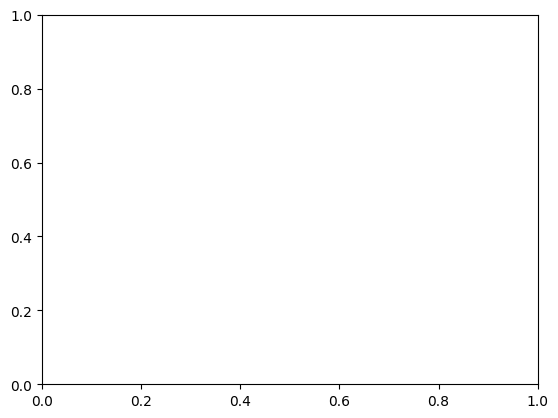

In [26]:
fig, ax = plt.subplots()
ax.plot(t, C[0][:], label = "cA")
ax.plot(t, C[1][:], label = "cB")
ax.plot(t, C[2][:], label = "cC")
ax.set_xlabel("time /s")
ax.set_ylabel("concentration [mol/L]")
ax.set_title("Analytical solution")
ax.legend()
ax.grid()
fig.show()